## Waxman parameters experiment

Voglio capire che parametri dare al modello di Waxman per genere grafi random di rete

α, β sono settati allo stesso valore

voglio capire il minimo valore per cui, mediamente ed entro 500 tentativi, riesco a generare un grafo connesso

mi interessa usare valori bassi del parametro per non avere una topologia troppo densa di archi

references :

- Connectivity of Waxman topology models (M. Naldi - 2005)
- Average path length in random networks (Agata Fronczak, Piotr Fronczak and Janusz A. Ho lyst - 2018)

In [12]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation

In [13]:
# circa 90 minuti per eseguirla

RUN_EXPERIMENT = False

if RUN_EXPERIMENT:
    DATA = {}
    for n in range(2,101):
        print(n)
        DATA[n] = []
        for _ in range(10):
            for i in range(1, 101):
                α = i/100
                β = i/100
                generated = False
                for _ in range(500):
                    G = nx.waxman_graph(n, β, α, domain=(-200,-200,200,200))
                    if nx.is_connected(G):
                        print(f"graph generated with α = β = {α}")
                        DATA[n].append(α)
                        generated = True
                        break
                if generated: 
                    break

In [14]:
if RUN_EXPERIMENT:
    
    x = list(range(2,101))
    y_min = [min(DATA[n]) for n in range(2,101)]
    y_max = [max(DATA[n]) for n in range(2,101)]
    y_mean = [np.mean(DATA[n]) for n in range(2,101)]

    plt.figure(figsize=(10, 6))

    plt.plot(x, y_mean, label='mean',)
    plt.plot(x, y_min, label='min', color = 'green', linewidth=1, linestyle='--')
    plt.plot(x, y_max, label='max', color = 'red', linewidth=1, linestyle='--')


    plt.xlabel("# nodes")
    plt.ylabel("α = β")
    plt.legend(loc="upper right")
    plt.title('minimum waxman parameters that give a connected graph')
    plt.show()

In [15]:
if RUN_EXPERIMENT:
    
    f = open("waxman_parameters.txt", "w")
    for a,b in zip(x,y_min):
        f.write(f"{a} {round(b-0.01,2)}\n")

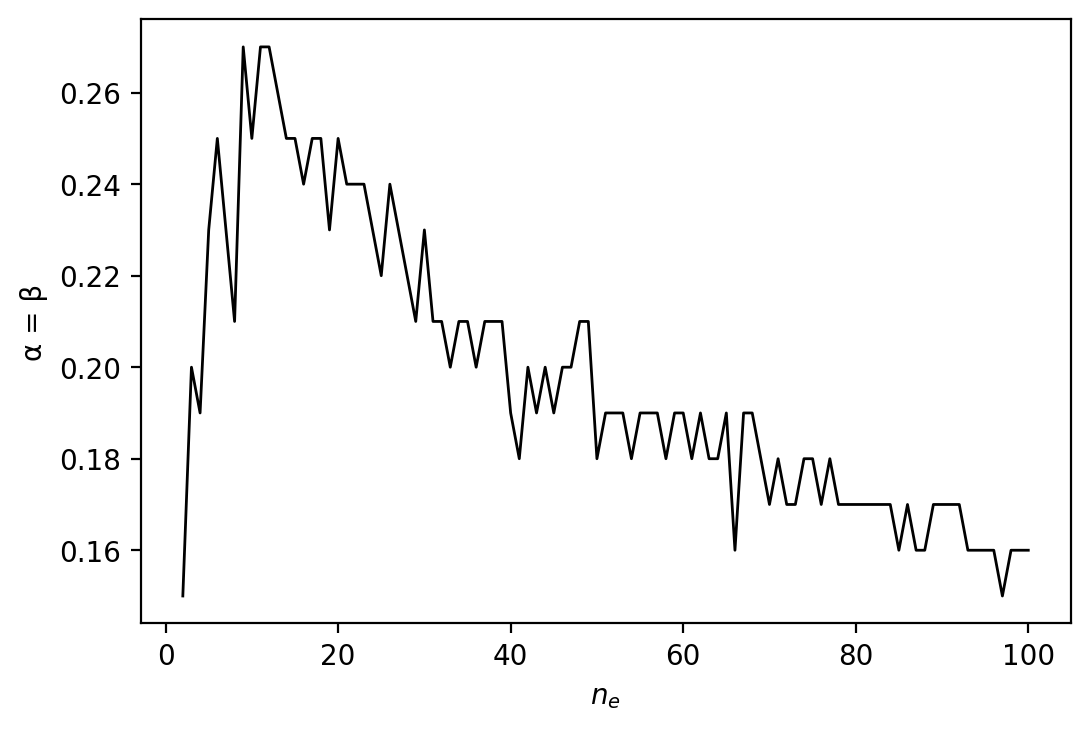

In [16]:
with open("waxman_parameters.txt", "r") as f:
    x, y = [], []
    for line in f:
        x_,y_ = line.strip().split()
        x.append(int(x_))
        y.append(float(y_))

plt.figure(dpi=200) 
plt.plot(x, y, label='min', color = 'black', linewidth=1)


plt.xlabel("$n_e$")
plt.ylabel("α = β")
#plt.legend(loc="upper right")
#plt.title('minimum Waxman parameters that yield a connected graph')
plt.show()

